>>Jahnvi Gangwar <br>
>>102003372 <br>
>>CO!5

Get Dataset from here https://www.muratkoklu.com/datasets/

Check Feature Sparsity/Density

Check for Highly Correlated Features

Visualising Dataset.

Apply DT using SK Learn.

Apply DTusing cuml.

Apply K-Means using SK Learn

Apply K-Means Using cuml

Apply PCA using SKlearn

Apply PCA using cuml

Check for Performance Comparison

Submit the Code file here. https://forms.gle/EyugP9qVQzSAYSAV9

Best of Luck.

###libraries 

In [47]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

###for GPU

In [4]:
!pip install cudf-cu11 dask-cudf-cu11 --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.nvidia.com


In [31]:
train_size = 0.985

In [5]:
!pip install cuml-cu11 --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.nvidia.com


In [6]:
!pip install cugraph-cu11 --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.nvidia.com
  Using cached https://pypi.nvidia.com/cugraph-cu11/cugraph_cu11-23.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1142.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 1.5 MB/s eta 0:00:00


In [7]:
import cudf
import cuml
import os

#1. dataset: Date_Fruit_Datasets.csv

In [16]:
df = pd.read_csv("/content/Date_Fruit_Datasets.csv")

In [17]:
df.head(10)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
5,408953,2326.6931,840.1821,622.0076,0.6722,721.5921,0.9974,410036,0.7805,1.3508,...,3.6309,6.0285,6.2159,-41140371456,-33146710016,-27907301376,49.7001,45.3190,39.7371,BERHI
6,451414,2457.2080,889.3253,652.4316,0.6796,758.1281,0.9970,452755,0.7877,1.3631,...,3.0703,3.4163,4.9168,-63711666176,-64060743680,-52603465728,57.8060,58.5449,52.4199,BERHI
7,382636,2275.7791,808.0833,609.2819,0.6569,697.9880,0.9931,385277,0.7032,1.3263,...,3.6756,7.0258,5.3254,-29873577984,-33570080768,-33054025728,45.1768,48.2407,47.2167,BERHI
8,546063,2714.9480,916.3737,766.4536,0.5481,833.8279,0.9882,552598,0.7710,1.1956,...,3.4640,3.7416,4.8120,-95262416896,-79321833472,-69569445888,64.6188,59.9127,55.6509,BERHI
9,420044,2391.1230,836.9280,645.1822,0.6370,731.3116,0.9918,423531,0.7853,1.2972,...,3.3729,4.2898,5.4637,-74341122048,-58172182528,-42640556032,64.9094,58.2771,48.4820,BERHI


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [19]:
# df = df.drop(['Class'], axis=1)
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])



In [20]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,0
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,0
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,0
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,0
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,0


# 2. Check Feature Sparsity/Density

In [53]:
# Calculate the density of the DataFrame
density = df.astype(bool).sum(axis=1).sum() / df.size

# Print the density and sparsity of the DataFrame
print("Density of DataFrame: {:.2f}%".format(density * 100))
print("Sparsity of DataFrame: {:.2f}%".format((1 - density) * 100))


Density of DataFrame: 99.79%
Sparsity of DataFrame: 0.21%


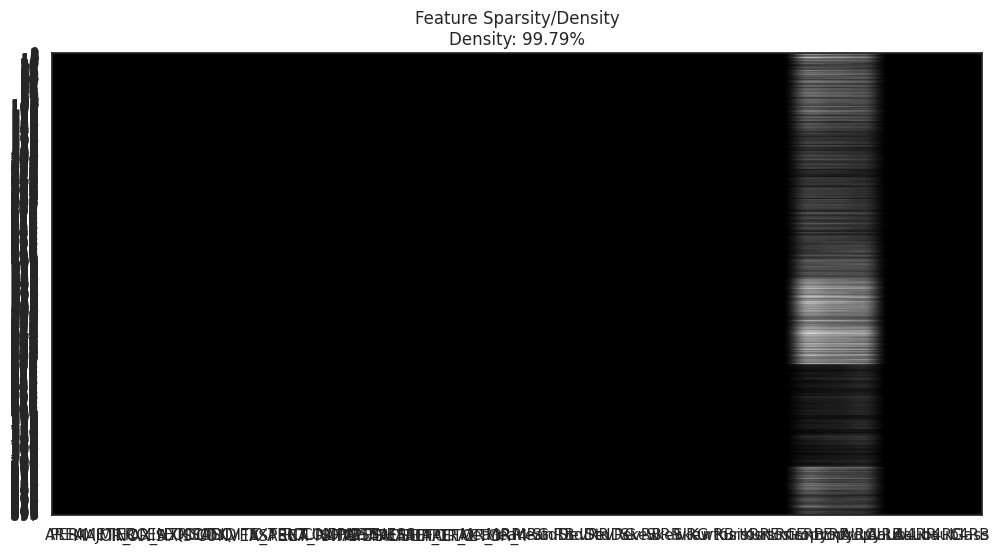

In [54]:
# Create a heatmap of the DataFrame 
fig, ax = plt.subplots(figsize=(12, 6))
ax.imshow(df, cmap='binary', aspect='auto')
ax.set_title("Feature Sparsity/Density\nDensity: {:.2f}%".format(density * 100))
plt.xticks(range(df.shape[1]), df.columns)
plt.yticks(range(df.shape[0]), df.index)
plt.show()

#3.Check for Highly Correlated Features

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Set the correlation threshold
corr_threshold = 0.8

# Find the highly correlated features
corr_pairs = [(i, j) for i in range(corr_matrix.shape[0]) for j in range(i+1, corr_matrix.shape[1]) if abs(corr_matrix.iloc[i,j]) >= corr_threshold]

# Print the highly correlated features
if corr_pairs:
    for pair in corr_pairs:
        print("Features {} and {} are highly correlated (correlation coefficient: {:.2f})".format(df.columns[pair[0]], df.columns[pair[1]], corr_matrix.iloc[pair[0], pair[1]]))
else:
    print("No highly correlated features found.")


Features AREA and PERIMETER are highly correlated (correlation coefficient: 0.96)
Features AREA and MAJOR_AXIS are highly correlated (correlation coefficient: 0.88)
Features AREA and MINOR_AXIS are highly correlated (correlation coefficient: 0.95)
Features AREA and EQDIASQ are highly correlated (correlation coefficient: 0.99)
Features AREA and CONVEX_AREA are highly correlated (correlation coefficient: 1.00)
Features AREA and SHAPEFACTOR_2 are highly correlated (correlation coefficient: -0.86)
Features PERIMETER and MAJOR_AXIS are highly correlated (correlation coefficient: 0.96)
Features PERIMETER and MINOR_AXIS are highly correlated (correlation coefficient: 0.86)
Features PERIMETER and EQDIASQ are highly correlated (correlation coefficient: 0.96)
Features PERIMETER and CONVEX_AREA are highly correlated (correlation coefficient: 0.96)
Features PERIMETER and SHAPEFACTOR_2 are highly correlated (correlation coefficient: -0.93)
Features MAJOR_AXIS and EQDIASQ are highly correlated (corr

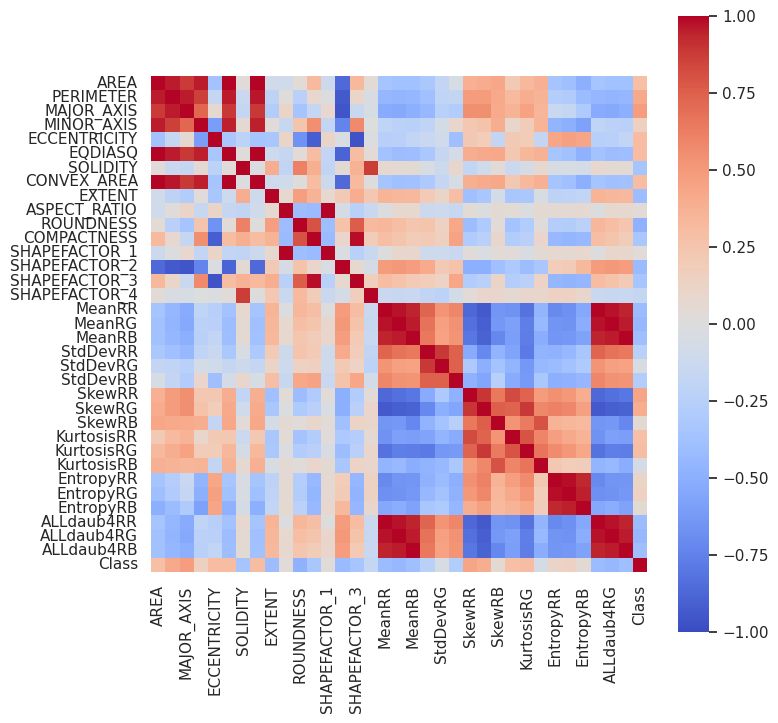

In [56]:
# Plot the correlation matrix as a heatmap
sns.set(style="white")
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, ax=ax)

plt.show()


#4.Visualising Dataset

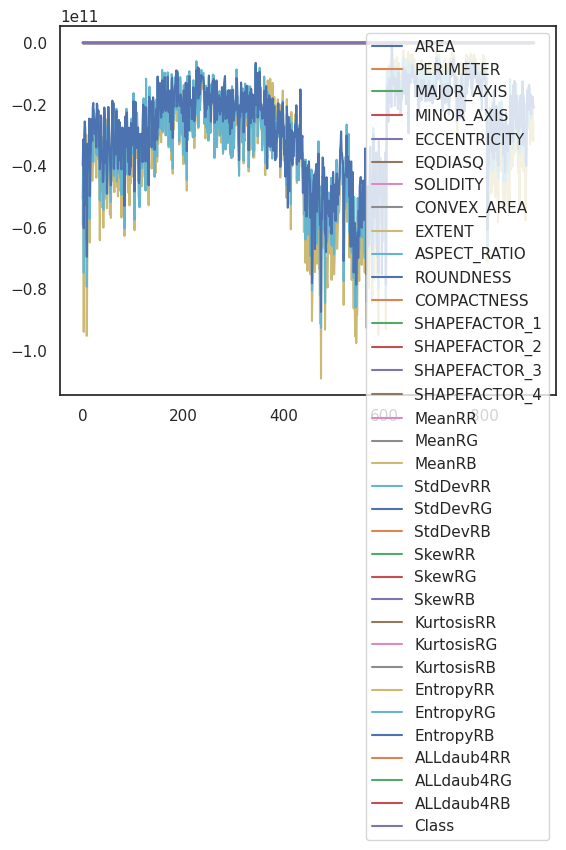

In [57]:
# Plot all columns in df
df.plot()
plt.show()


#5, 6.Apply DT using SK learn and cuml and then Random Forest for both with Comparision [Question 11]

## Decision Tree sklearn

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [94]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=13)

In [95]:
dt = DecisionTreeClassifier()

In [96]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [97]:
y_pred = dt.predict(X_test)


In [98]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9111111111111111


##Random Forest

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from cuml.ensemble import RandomForestClassifier as cuRF

In [78]:
# Split the data into features (X) and labels (y)
X = df.drop('Class', axis=1)
y = df['Class']

In [79]:
# Split the data into training and testing sets
train_rows = int(train_size * df.shape[0])
X_train, X_test = X[:train_rows], X[train_rows:]
y_train, y_test = y[:train_rows], y[train_rows:]

In [80]:
# Build a scikit-learn random forest classifier
rf_sk = RandomForestClassifier(n_estimators=100)
rf_sk.fit(X_train, y_train)
acc_sk = rf_sk.score(X_test, y_test)

In [80]:
# Build a cuML random forest classifier
rf_cu = cuRF(n_estimators=100)
rf_cu.fit(X_train, y_train)
acc_cu = rf_cu.score(X_test, y_test)

In [81]:
print(f"Accuracy (scikit-learn): {acc_sk:.4f}")
print(f"Accuracy (cuML): {acc_cu:.4f}")

Accuracy (scikit-learn): 0.9286
Accuracy (cuML): 0.9286


In [82]:
# Plot the accuracy comparison
labels = ['scikit-learn', 'cuML']
accuracy = [acc_sk, acc_cu]
x = np.arange(len(labels))
width = 0.35

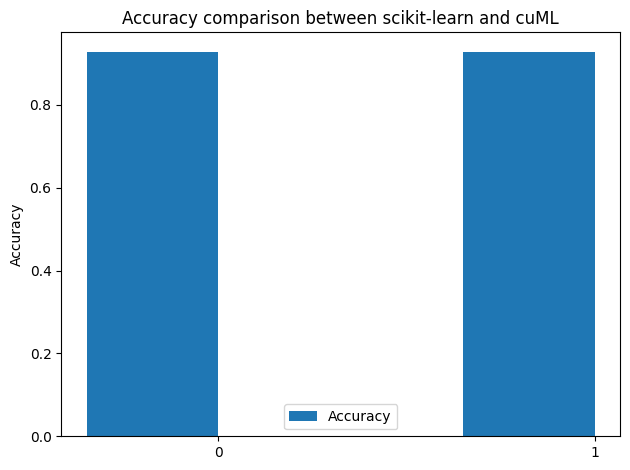

In [76]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy comparison between scikit-learn and cuML')
ax.set_xticks(x)
ax.legend()

fig.tight_layout()
plt.show()

#9, 10. Apply PCA using SKlearn and cuml and Comparisoin [Question11]

In [83]:
from sklearn.decomposition import PCA
from cuml import PCA as cuPCA

In [84]:
# Split the data into features (X) and labels (y)
X = df.drop('Class', axis=1)
y = df['Class']

In [86]:
# Build a scikit-learn PCA model
pca_sk = PCA(n_components=3)
X_sk = pca_sk.fit_transform(X)
var_sk = pca_sk.explained_variance_ratio_

In [87]:
# Build a cuML PCA model
pca_cu = cuPCA(n_components=3)
X_cu = pca_cu.fit_transform(X)
var_cu = pca_cu.explained_variance_ratio_

In [88]:
print(f"Explained Variance Ratio (scikit-learn): {var_sk}")
print(f"Explained Variance Ratio (cuML): {var_cu}")


Explained Variance Ratio (scikit-learn): [0.97411924 0.01972759 0.00615317]
Explained Variance Ratio (cuML): 0    0.974119
1    0.019728
2    0.006153
dtype: float64


In [47]:
X_sk

array([[ 3.64786775e+10, -6.02523925e+09, -4.04677271e+08],
       [ 8.17352999e+09,  9.78121742e+08, -4.83178998e+09],
       [ 8.31706354e+10, -9.08484133e+09,  2.97360600e+09],
       ...,
       [-1.66266585e+10, -2.65190310e+09,  4.22326478e+08],
       [-1.20445238e+10, -2.88648059e+09,  1.54426377e+09],
       [-7.84419158e+09, -4.57893129e+09,  5.71199251e+09]])

In [48]:
X_cu

,0,1,2
0,-3.647868e+10,6.025239e+09,4.046773e+08
1,-8.173530e+09,-9.781217e+08,4.831790e+09
2,-8.317064e+10,9.084841e+09,-2.973606e+09
3,-2.758335e+09,-1.101601e+09,1.982343e+09
4,-8.385948e+09,6.771337e+09,1.706933e+09
...,...,...,...
893,1.439400e+10,3.388667e+09,-2.602985e+09
894,8.199023e+09,6.225501e+09,-3.918912e+09
895,1.662666e+10,2.651903e+09,-4.223265e+08
896,1.204452e+10,2.886481e+09,-1.544264e+09


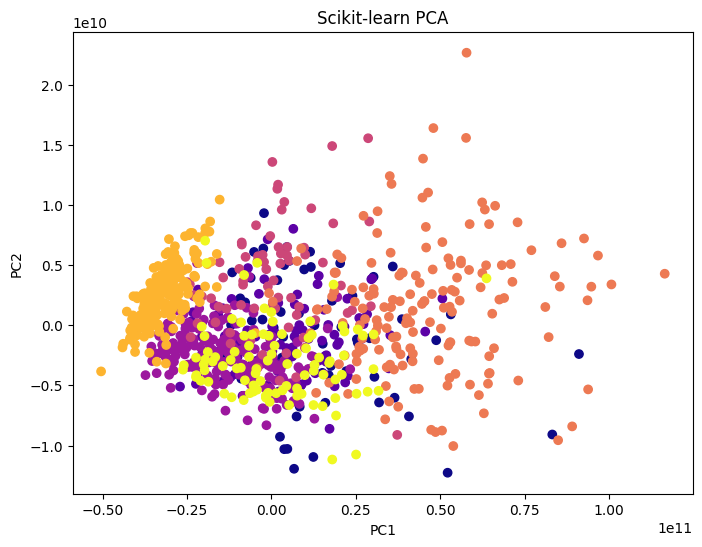

In [49]:
# Import required libraries
import matplotlib.pyplot as plt

# Generate scatter plot for scikit-learn
plt.figure(figsize=(8, 6))
plt.scatter(X_sk[:, 0], X_sk[:, 1], c=y, cmap='plasma')
plt.title('Scikit-learn PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

<ipython-input-62-69e7d2aac81f>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_pca_np[:, 0], df_pca_np[:, 1], cmap='plasma')


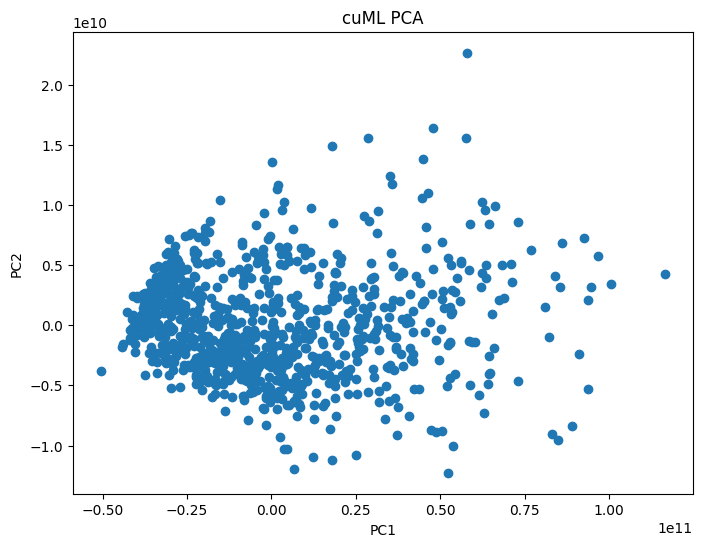

In [62]:
from cuml.decomposition import PCA

# Convert the Pandas DataFrame to a cuDF dataframe
df_cu = cudf.DataFrame.from_pandas(df)

# Create a cuML PCA object
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(df_cu)

# Transform the data using the PCA model
df_pca = pca.transform(df_cu)

# Convert the transformed data to a NumPy array
df_pca_np = df_pca.to_numpy()

# Generate scatter plot for cuML
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_np[:, 0], df_pca_np[:, 1], cmap='plasma')
plt.title('cuML PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


#8.Apply K-Means Using cuml

In [94]:
from time import time

In [102]:
df = pd.read_csv("/content/Date_Fruit_Datasets.csv")
# df = df.drop(['Class'], axis=1)
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])



In [103]:


from cuml.cluster import KMeans as KMeans

kmeans = KMeans(n_clusters=10, random_state=0)
cufit_lines=[]
cufit_time=[]
for i in range(0,len(df)):
  tic = time()
  clusters = kmeans.fit(df)
  toc = time()
  running_time = (toc - tic) * 1000
  cufit_lines.append(len(df))
  cufit_time.append(running_time)

#7.Apply K-Means using SK Learn


In [104]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10, random_state = 0, n_init= 'auto')
skfit_lines=[]
skfit_time=[]
tic = time()
clusters = kmeans.fit(df)
toc = time()
running_time = (toc - tic) * 1000
skfit_lines.append(len(df))
skfit_time.append(running_time)

In [105]:
skfit_lines

[898]

In [106]:
skfit_time

[142.39001274108887]

#11

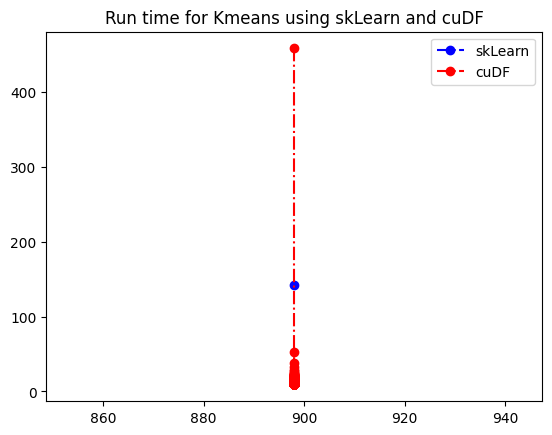

In [107]:
# plot lines
plt.plot(skfit_lines, skfit_time,'bo', label = "skLearn",linestyle="-.")
plt.plot(cufit_lines, cufit_time,'ro', label = "cuDF",linestyle="-.")
plt.legend()
plt.title("Run time for Kmeans using skLearn and cuDF")
plt.show()